# 相関係数

In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv('./products_dataset_decile.csv')

In [2]:
df = df.drop('product_id', axis=1)
df = df.drop('product_category_name', axis=1)
df = df.drop('decile', axis=1)
df = df.dropna()
df

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,count_sold
0,44.0,903.0,6.0,2600.0,50.0,10.0,30.0,527
1,54.0,245.0,1.0,1383.0,50.0,10.0,40.0,488
2,56.0,348.0,2.0,1550.0,30.0,22.0,30.0,484
3,59.0,341.0,2.0,1750.0,37.0,22.0,40.0,392
4,57.0,366.0,2.0,1650.0,30.0,22.0,30.0,388
...,...,...,...,...,...,...,...,...
32946,53.0,1143.0,4.0,1250.0,45.0,30.0,15.0,1
32947,34.0,1043.0,2.0,600.0,24.0,18.0,23.0,1
32948,51.0,641.0,1.0,500.0,20.0,12.0,13.0,1
32949,50.0,1953.0,1.0,2000.0,28.0,19.0,21.0,1


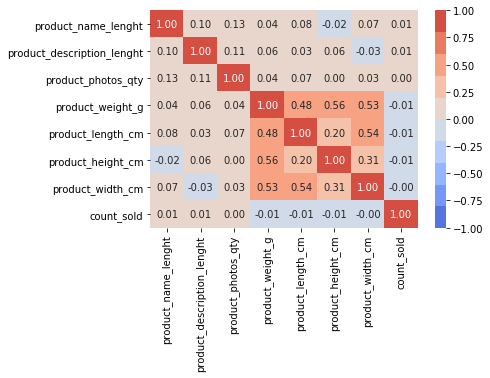

In [3]:
import seaborn as sns

sns.heatmap(df[df.columns].corr(), cmap= sns.color_palette('coolwarm', 10), annot=True,fmt='.2f', vmin = -1, vmax = 1)

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

'''
df_category = df[['count_sold', 'product_category_name']]
df_category = pd.get_dummies(df_category, columns=['product_category_name'])
df_category = df_category.dropna()

plt.figure(figsize=(50, 50)) #heatmap size
sns.heatmap(df_category[df_category.columns].corr(), cmap= sns.color_palette('coolwarm', 10), annot=True,fmt='.2f', vmin = -1, vmax = 1)
plt.show()
'''

"\ndf_category = df[['count_sold', 'product_category_name']]\ndf_category = pd.get_dummies(df_category, columns=['product_category_name'])\ndf_category = df_category.dropna()\n\nplt.figure(figsize=(50, 50)) #heatmap size\nsns.heatmap(df_category[df_category.columns].corr(), cmap= sns.color_palette('coolwarm', 10), annot=True,fmt='.2f', vmin = -1, vmax = 1)\nplt.show()\n"

# PCA

In [5]:
from sklearn.decomposition import PCA

X = df.drop('count_sold', axis=1)
y = df['count_sold']

X

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,44.0,903.0,6.0,2600.0,50.0,10.0,30.0
1,54.0,245.0,1.0,1383.0,50.0,10.0,40.0
2,56.0,348.0,2.0,1550.0,30.0,22.0,30.0
3,59.0,341.0,2.0,1750.0,37.0,22.0,40.0
4,57.0,366.0,2.0,1650.0,30.0,22.0,30.0
...,...,...,...,...,...,...,...
32946,53.0,1143.0,4.0,1250.0,45.0,30.0,15.0
32947,34.0,1043.0,2.0,600.0,24.0,18.0,23.0
32948,51.0,641.0,1.0,500.0,20.0,12.0,13.0
32949,50.0,1953.0,1.0,2000.0,28.0,19.0,21.0


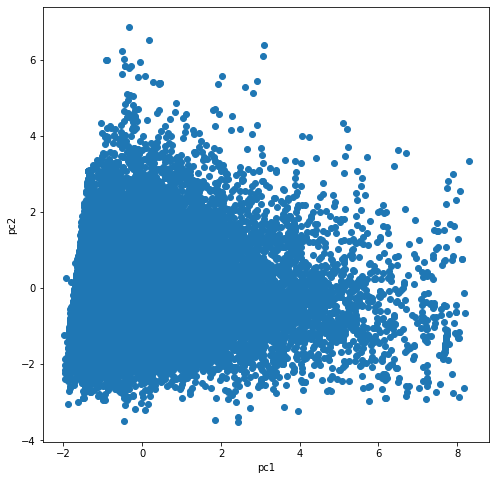

In [6]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA()
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.xlabel('pc1'); plt.ylabel('pc2')

plt.show()

In [7]:
pca.explained_variance_ratio_

array([0.33475172, 0.17428792, 0.13979438, 0.12367854, 0.1142434 ,
       0.0629735 , 0.05027054])

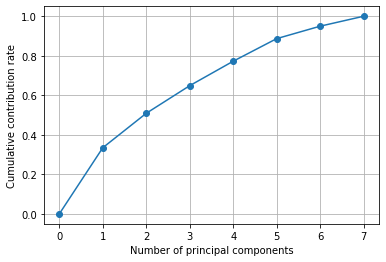

In [8]:
import numpy as np
import matplotlib.ticker as ticker

plt.gca().get_xaxis().set_major_locator(ticker.MaxNLocator(integer=True))
plt.plot([0] + list( np.cumsum(pca.explained_variance_ratio_)), "-o")
plt.xlabel("Number of principal components")
plt.ylabel("Cumulative contribution rate")
plt.grid()
plt.show()

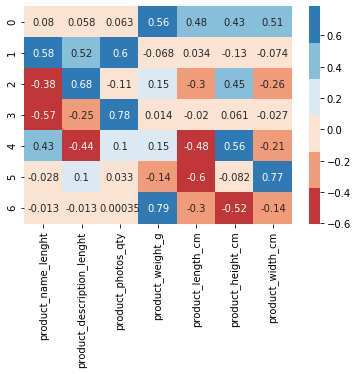

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(pca.components_, xticklabels=X.columns, cmap=sns.color_palette('RdBu'), annot=True)